#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os  # cv2 : OpenCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = ',')
    plt.plot(history['val_loss'], label='val_err', marker = ',')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [ ]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

* 이미지 확인하기

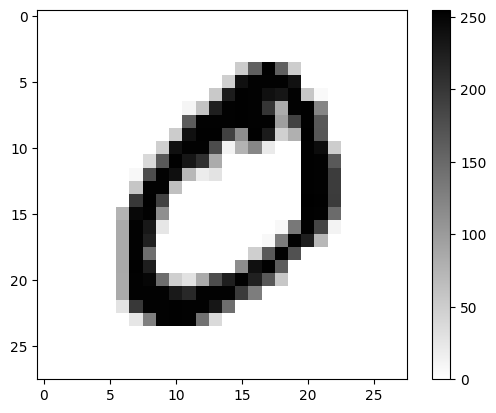

In [ ]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

* 이미지를 픽셀 값(배열 값)으로 확인하기

In [ ]:
# numpy array 화면 출력시 문자열 길이 조정
np.set_printoptions(linewidth=500)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60, 224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253, 253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,  84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,  28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,   0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,   0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,   0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,   0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85, 178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252, 252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252, 233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

* 여러 이미지 확인하기

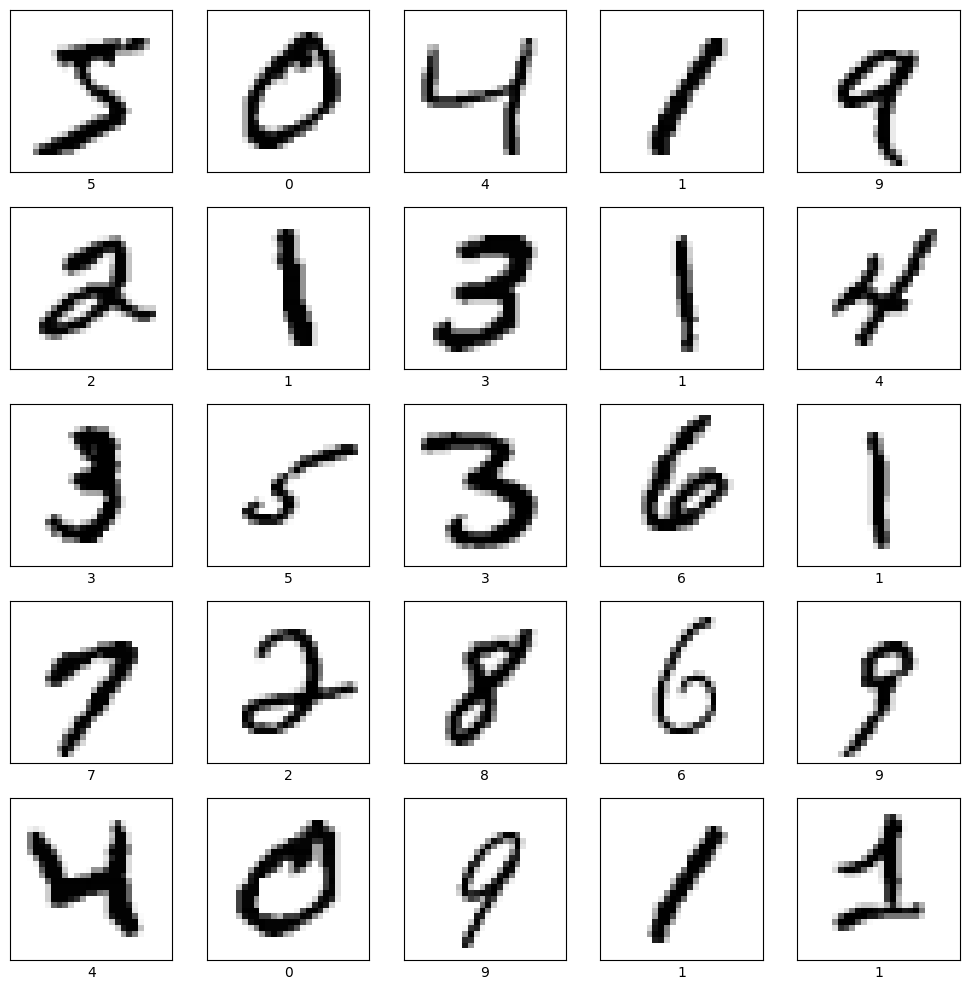

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [ ]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

In [ ]:
x_train.shape # 4차원

(60000, 28, 28, 1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_val 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.CNN 기본 모델링

### (1) 모델 설계
* CNN 모델의 기본 구조
    * Conv2D  : 지역적인 특징 도출
    * MaxPooling : 요약
    * Flatten : 1차원으로 펼치기
    * Dense : Output Layer

In [ ]:
## 여기부터 딥러닝 요약
clear_session()

model = Sequential([Conv2D(16, kernel_size = 3, input_shape=(28, 28, 1),
                    # 필터 = 특징을 찾는다
                    # 필터(커널) 16개, 필터크기 3x3 # CNN 인풋은 무조건 3차원 / 데이터셋은 4차원
                    # MaxPooling2D과 세트로 외우기

                           padding='same', activation='relu'),
                           # strides = 1(기본값,1)
                           # 이미지 테두리 0으로 채우기 / 원래 인풋사이즈(28x28)와 동일하게

                    MaxPooling2D(pool_size = 2 ),
                    # 데이터 크니까 중요 데이터만 요약하자 / max값만 뽑겠다
                    # strides = 2(기본값이 pool_size 동일)


                    Flatten(), # 1차원으로 만들어서 for 마지막 Dense layer
                    Dense(10, activation='softmax') # dense레이어로 연결
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 31530 (123.16 KB)
Trainable params: 31530 (123.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) 학습

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3190 - val_loss: 0.1673
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1372 - val_loss: 0.1140
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0935 - val_loss: 0.0861
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0744 - val_loss: 0.0810
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0628 - val_loss: 0.0756
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0543 - val_loss: 0.0778
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0475 - val_loss: 0.0741
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0418 - val_loss: 0.0719
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0380 - val_loss: 0.0715
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.034

### (3) 학습결과 그래프

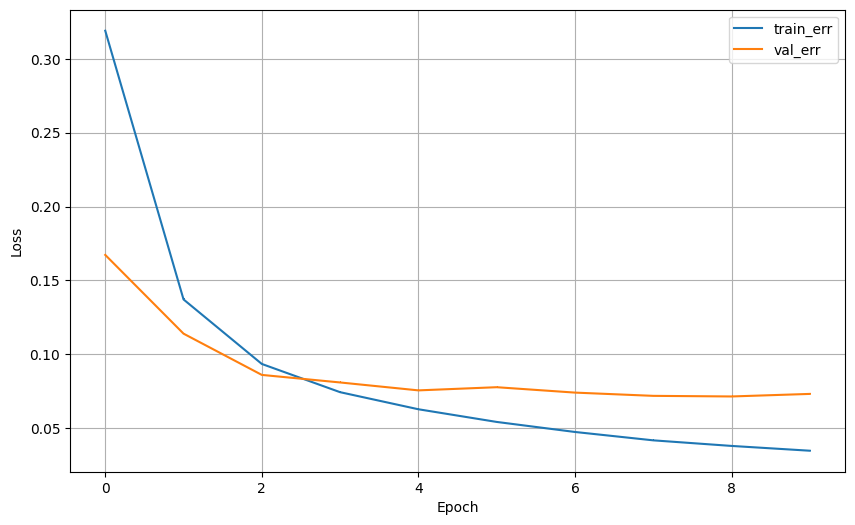

In [ ]:
dl_history_plot(history)

### (4) 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9789
------------------------------------------------------------
[[ 973    1    0    1    0    1    2    0    1    1]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   5   11  993    1    1    0    3   12    4    2]
 [   3    1    4  983    0   12    0    3    4    0]
 [   1    2    1    0  964    0    2    2    1    9]
 [   2    0    0    5    0  876    5    1    2    1]
 [   8    2    0    0    6    3  935    0    4    0]
 [   0    7    6    2    0    0    0 1010    0    3]
 [   6    2    2    0    2    5    1    6  945    5]
 [   3    4    0    2    6    4    0   10    2  978]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5   

## 5.실습


### (1) 모델1
* 기본 모델링에서 다음을 조정해 봅시다.
    * Flatten 이후 Dense 레이어 추가(노드수 128)

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [ ]:
clear_session()

model2 = Sequential([Conv2D(16, kernel_size = 3, input_shape=(28, 28, 1),
                    padding='same', activation='relu'),

                    MaxPooling2D(pool_size = 2 ),

                    # 추가
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 402986 (1.54 MB)
Trainable params: 402986 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

In [ ]:
history = model2.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.1927 - val_loss: 0.0860
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0624 - val_loss: 0.0606
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0401 - val_loss: 0.0550
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0265 - val_loss: 0.0556
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0180 - val_loss: 0.0572
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0124 - val_loss: 0.0508
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0104 - val_loss: 0.0531
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0066 - val_loss: 0.0584
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0058 - val_loss: 0.0559
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.004

* 학습결과 그래프

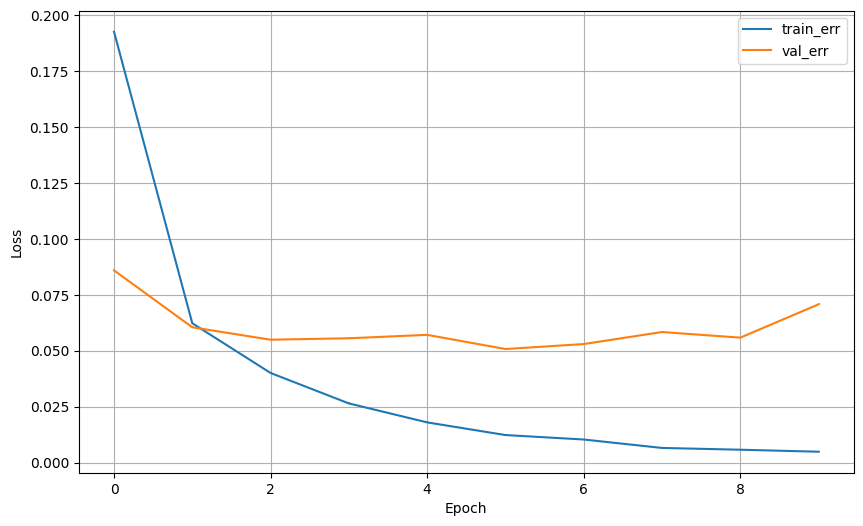

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model2.predict(x_val)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9863
------------------------------------------------------------
[[ 968    1    0    2    1    1    5    0    2    0]
 [   0 1131    1    2    0    0    0    1    0    0]
 [   2    1 1019    1    0    0    1    5    3    0]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    1    1    0  966    0    1    1    0   12]
 [   0    0    0   14    0  872    4    0    2    0]
 [   1    3    0    1    4    2  946    0    1    0]
 [   0    2    8    2    0    0    0 1011    2    3]
 [   0    1    1    8    1    3    0    3  953    4]
 [   0    1    0    3    4    3    0    5    0  993]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5   



```
# 코드로 형식 지정됨
```

### (2) 모델2
* 모델2에 이어서, 아래 그림을 보고, 빠진 부분을 추가하시오.

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [ ]:
clear_session()

model3 = Sequential([Conv2D(32, kernel_size = 3, input_shape=(28, 28, 1), padding='same', activation='relu'), # strides = 1 기본값
                    MaxPooling2D(pool_size = 2 ), # strides = pool_size 기본값

                    # 추가
                    Conv2D(64, kernel_size = 3, padding='same', activation='relu'),  # input shape 없음
                    MaxPooling2D(pool_size = 2 ),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
hist = model3.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')

In [ ]:
history = model3.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1477 - val_loss: 0.0680
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0803 - val_loss: 0.0726
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0694 - val_loss: 0.0738
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0650 - val_loss: 0.0717
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0605 - val_loss: 0.1291
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0594 - val_loss: 0.1051
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0610 - val_loss: 0.1395
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0565 - val_loss: 0.1087
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0579 - val_loss: 0.1115
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.053

* 학습결과 그래프

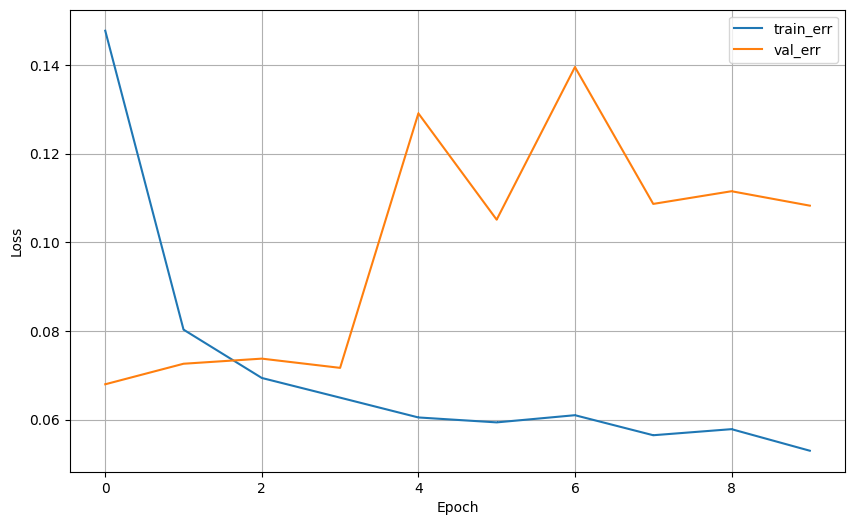

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model3.predict(x_val)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

# 13 / 3을 8로 헷갈리는 개수 많다 분석

0.9836
------------------------------------------------------------
[[ 973    0    1    0    0    0    4    1    0    1]
 [   1 1123    2    2    0    0    2    3    2    0]
 [   0    1 1018    2    0    0    0    8    3    0]
 [   0    0    1  986    0    7    0   13    3    0]
 [   0    0    2    0  964    0    1    1    2   12]
 [   1    0    0    5    0  881    3    0    1    1]
 [   4    1    0    1    1    3  945    0    3    0]
 [   0    1    4    1    2    1    0 1017    1    1]
 [   1    0    5    1    1    5    1    1  951    8]
 [   1    0    0    1    4    6    0   12    7  978]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5   

## 6.틀린그림 찾아보기
* 모델3의 결과에서 틀린 그림을 살펴 봅시다.
* 아래코드는 이해하기보다는 그냥 사용하기 바랍니다.

In [ ]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(327, 28, 28)


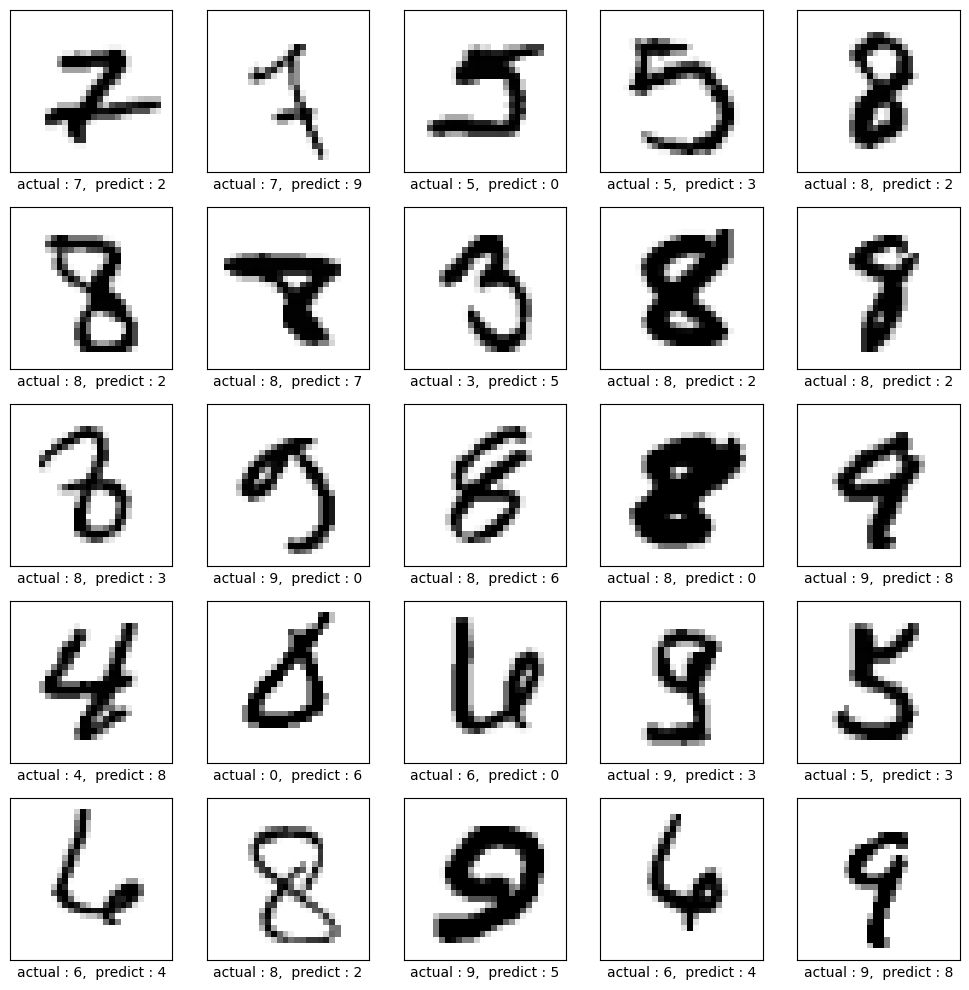

In [ ]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {y_temp[i]},  predict : {p_temp[i]}')
plt.tight_layout()
plt.show()

## 7.진짜 손글씨로 예측해 봅시다.

* 이미지 처리를 위한 라이브러리와 함수 불러오기

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 그린 손글씨를 업로드 합니다.

In [ ]:
# 코랩 왼쪽 폴더에 추가해야함!

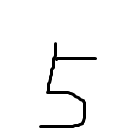

(140, 140)


In [ ]:
# 파일 열기
img = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

* 이미지 크기를 28, 28, 1 로 맞추기

In [ ]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28)) # (140, 140) -> 원래 사이즈(28,28)로 맞추기 / 0 검은색 255 흰색
print(img.shape)
cv2_imshow(img)

(28, 28)


* 예측하기

In [ ]:
# 입력데이터 형식을 갖추기
test_num = img.reshape(1,28,28,1)

# 60000, 28,28,1 데이터 셋 구조 / 4차원
# 28,28,1 데이터 1개 구조

# 예측하기
pred = model.predict(test_num) # 이구조 중요, x_train 구조와 맞춰줘야됨 4차원 (60000, 28,28,1)
pred_1 = pred.argmax(axis=1)
print(pred_1)

1/1 [==============================] - 0s 20ms/step
[6]


In [ ]:
## 과적합 : 트레인셋에 너무 학습 잘됨